In [81]:
import sys
import matplotlib.pyplot as plt

# import csv file and convert one column to list
def import_csv(filename, columns:list):
    data_requested = dict()
    
    with open(sys.path[0] + '/../data/' + filename, 'r') as f:

        header = f.readline()
        header = header.split(',')
        for column in columns:
            columns[columns.index(column)] = header.index(column)


        reader = f.readlines()
        for row in reader:
            row = row.split(',')
            for column in columns:
                data_requested.setdefault(header[column], []).append(row[column])
    return data_requested
    

In [82]:
# import metadata file and get the column with the diagnostics as list
data_reviewed = import_csv('metadata.csv', ['diagnostic','smoke','drink','age'])

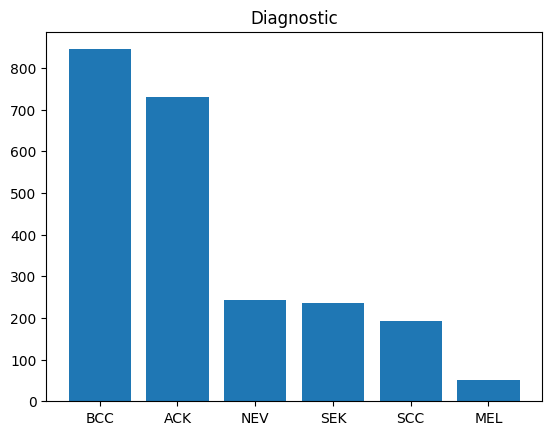

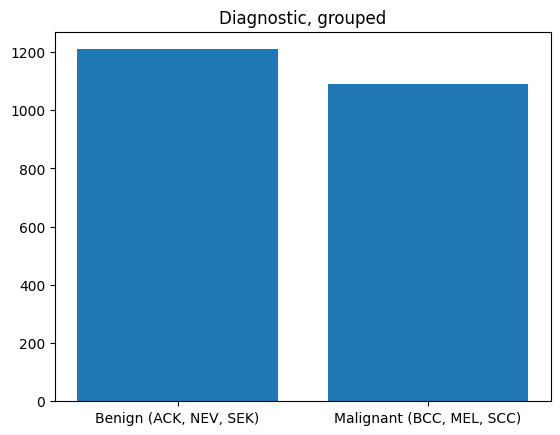

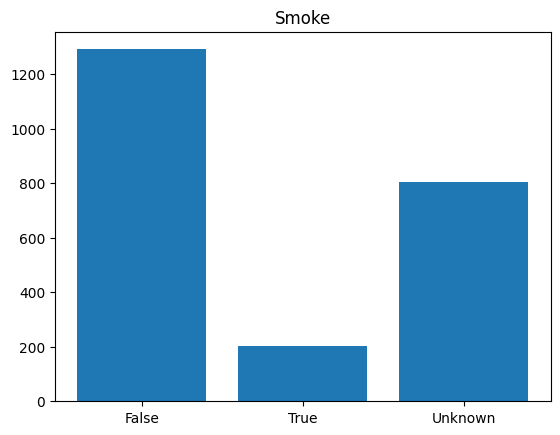

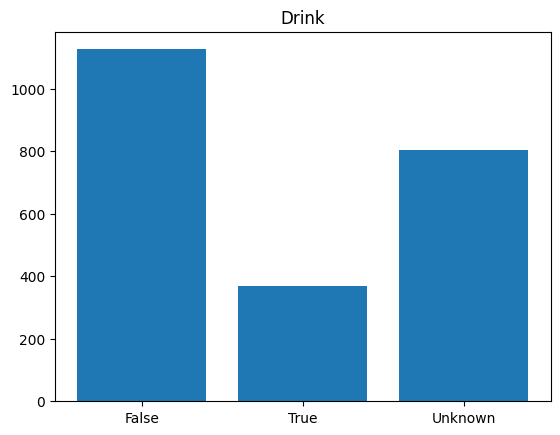

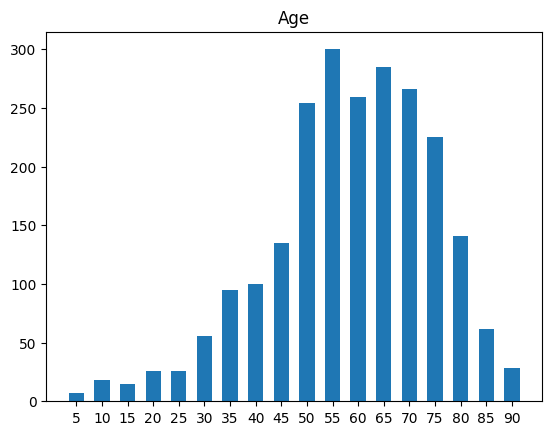

In [107]:
def plot_all(data):
    if 'diagnostic' in data.keys():
        # count how many of each diagnostic
        diagnostic_count = dict()
        for diagnostic in data['diagnostic']:
            diagnostic_count[diagnostic] = diagnostic_count.get(diagnostic, 0) + 1
        # order them from most to least
        diagnostic_count = dict(sorted(diagnostic_count.items(), key=lambda item: item[1], reverse=True))
        # plot them
        plt.bar(diagnostic_count.keys(), diagnostic_count.values())
        plt.title('Diagnostic')
        plt.show()

        # plot as benign/malignant
        benign = ['ACK', 'NEV', 'SEK']
        malignant = ['BCC', 'MEL', 'SCC']
        diagnostic_count = dict()
        for diagnostic in data['diagnostic']:
            if diagnostic in benign:
                diagnostic_count['Benign (ACK, NEV, SEK)'] = diagnostic_count.get('Benign (ACK, NEV, SEK)', 0) + 1
            elif diagnostic in malignant:
                diagnostic_count['Malignant (BCC, MEL, SCC)'] = diagnostic_count.get('Malignant (BCC, MEL, SCC)', 0) + 1
        plt.bar(diagnostic_count.keys(), diagnostic_count.values())
        plt.title('Diagnostic, grouped')
        plt.show()

    if 'smoke' in data.keys():
        smoke_count = dict()
        for smoke in data['smoke']:
            if smoke != '':
                smoke_count[smoke] = smoke_count.get(smoke, 0) + 1
        smoke_count['Unknown'] = data['smoke'].count('')
        plt.bar(smoke_count.keys(), smoke_count.values())
        plt.title('Smoke')
        plt.show()
    
    if 'drink' in data.keys():
        drink_count = dict()
        for drink in data['drink']:
            if drink != '':
                drink_count[drink] = drink_count.get(drink, 0) + 1
        drink_count['Unknown'] = data['drink'].count('')
        plt.bar(drink_count.keys(), drink_count.values())
        plt.title('Drink')
        plt.show()
    
    if 'age' in data.keys():
        # plot age approximating it to the nearest 5
        age_count = dict()
        for age in data['age']:
            if age != '':
                age = int(age)
                age = age - age % 5
                age_count[age] = age_count.get(age, 0) + 1
        plt.bar(age_count.keys(), age_count.values(), width=3)
        plt.xticks(list(age_count.keys()))
        plt.title('Age')
        plt.show()





plot_all(data_reviewed)